In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [65]:
zoo = pd.read_csv("./zoo/zoo.data", header=None)
zoo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [66]:
#Adding Column Names to the Dataset
zoo.columns = [
    "animal name",
    "hair",
    "feathers",
    "eggs",
    "milk",
    "airborne",
    "aquatic",
    "predator",
    "toothed",
    "backbone",
    "breathes",
    "venomous",
    "fins",
    "legs",
    "tail",
    "domestic",
    "catsize",
    "type",
]

In [67]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [68]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [69]:
zoo.drop("animal name", axis = 1, inplace=True)

In [70]:
#Checking whether the dataset contains any null values
print(zoo.isna().values.any())
print(zoo.isnull().values.any())

False
False


In [71]:
correlation_matrix = zoo.corr()
correlation_matrix["type"]

hair       -0.562384
feathers   -0.197520
eggs        0.661825
milk       -0.723683
airborne    0.022677
aquatic     0.326639
predator    0.061179
toothed    -0.471527
backbone   -0.828845
breathes   -0.519308
venomous    0.321476
fins        0.099430
legs        0.131693
tail       -0.631830
domestic   -0.181043
catsize    -0.521030
type        1.000000
Name: type, dtype: float64

In [72]:
#Separating the Independent and the Dependent Variables
X = zoo.drop("type", axis=1)
X = X.values
y = zoo["type"]
y = y.values

In [73]:
#Creating an numpy array for the data points obtained from the correlation matrix
new_data_point = np.array([
    -0.562384,
    -0.197520,
    0.661825,
    -0.723683,
    0.022677,
    0.326639,
    0.061179,
    -0.471527,
    -0.828845,
    -0.519308,
    0.321476,
    0.099430,
    0.131693,
    -0.631830,
    -0.181043,
    -0.521030,
])

In [74]:
#Calculating the Distance between the new datapoint and the each of the datapoints in the zoo dataset
#the length of the vector is called the norm. The norm is a positive value that indicates the magnitude of the vector.
distances = np.linalg.norm(X - new_data_point, axis =1) #This will give the vector of distances

In [75]:
#Keeping the Number of neighbors to be 5 (k = 5)
#We are going to sort the distances from lowest to highest using argsort

k = 5
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids #These three neighbors are closer to the target variable

array([13, 77, 99, 81, 73], dtype=int64)

In [76]:
#Combining those neighbors for prediction
#finding the ground truth
nearest_neighbor_type = y[nearest_neighbor_ids]
nearest_neighbor_type

array([7, 7, 7, 7, 4], dtype=int64)

Prediction

Mean for Regression

In [77]:
#Prediction - Regression
prediction = nearest_neighbor_type.mean()
prediction # This means that the 5-Nearest Neighbor prediction for the new data point is the value we get

6.4

Mode for Classification

In [78]:
#To calculate Mode

import scipy.stats
class_neighbors = np.array(zoo["type"])
scipy.stats.mode(class_neighbors)


ModeResult(mode=array([1], dtype=int64), count=array([41]))

Fitting the KNN Model

In [79]:
#Splitting the Datast into Training and Test Datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456)

In [80]:
#For Regressor
from sklearn.neighbors import KNeighborsRegressor
knn_model_regression = KNeighborsRegressor(n_neighbors=5) #This is the Value of K
knn_model_regression.fit(X_train, y_train)

KNeighborsRegressor()

In [81]:
#For Classification
from sklearn.neighbors import KNeighborsClassifier
knn_model_classification = KNeighborsClassifier(n_neighbors=5)
knn_model_classification.fit(X_train, y_train)

KNeighborsClassifier()

Evaluating the Model - Regression

In [82]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
y_pred_regression = knn_model_regression.predict(X_test)
mae_regression = mean_absolute_error(y_test, y_pred_regression)
print("Mean Absolute Error (MAE): ", mae_regression)

Mean Absolute Error (MAE):  0.296774193548387


In [83]:
#Root Mean Square Error (RMSE)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model_regression.predict(X_train)
mse_train = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_train)
print("RMSE on Train Data: ",rmse_train)

mse_test = mean_squared_error(y_test, y_pred_regression)
rmse_test = sqrt(mse_test)
print("RMSE on Test Data: ", rmse_test)

RMSE on Train Data:  0.4484895284651105
RMSE on Test Data:  0.8222706563279906


In [84]:
#R-Squared (R2) Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_regression)
print("R-Squared (R2) Score: ", r2)

R-Squared (R2) Score:  0.8178923766816144


Evaluating the Model - Classification

In [85]:
#Accuracy Score
from sklearn.metrics import accuracy_score
y_pred_classification = knn_model_classification.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_classification)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.8709677419354839


In [86]:
#Confusion Matrix - For Evaluating Class-Wise Performance

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classification)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[11  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  3  0  0  0]]


In [87]:
#Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_classification)
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         3

    accuracy                           0.87        31
   macro avg       0.64      0.71      0.67        31
weighted avg       0.81      0.87      0.83        31



Choosing the Best K value

In [88]:
#Getting the Accruacy Scores for differect values of n

from sklearn.model_selection import cross_val_score
k_list = np.arange(1, 50, 2)
accuracy_list = []
mean_scores = []
error_rate = []

X_train_np = np.ascontiguousarray(X_train)
y_train_np = np.ascontiguousarray(y_train)
X_test_np = np.ascontiguousarray(X_test)

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_np, y_train_np)
    pred_i = knn.predict(X_test_np)
    score = cross_val_score(knn, X_train_np, y_train_np, cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))
    accuracy = accuracy_score(y_test, pred_i)
    accuracy_list.append(accuracy)

accuracy_data = pd.DataFrame({'k': k_list, 'Accuracy': accuracy_list})
print(accuracy_data)

     k  Accuracy
0    1  1.000000
1    3  0.903226
2    5  0.870968
3    7  0.870968
4    9  0.838710
5   11  0.838710
6   13  0.838710
7   15  0.838710
8   17  0.838710
9   19  0.838710
10  21  0.838710
11  23  0.838710
12  25  0.741935
13  27  0.612903
14  29  0.580645
15  31  0.516129
16  33  0.483871
17  35  0.483871
18  37  0.483871
19  39  0.354839
20  41  0.354839
21  43  0.354839
22  45  0.354839
23  47  0.354839
24  49  0.354839


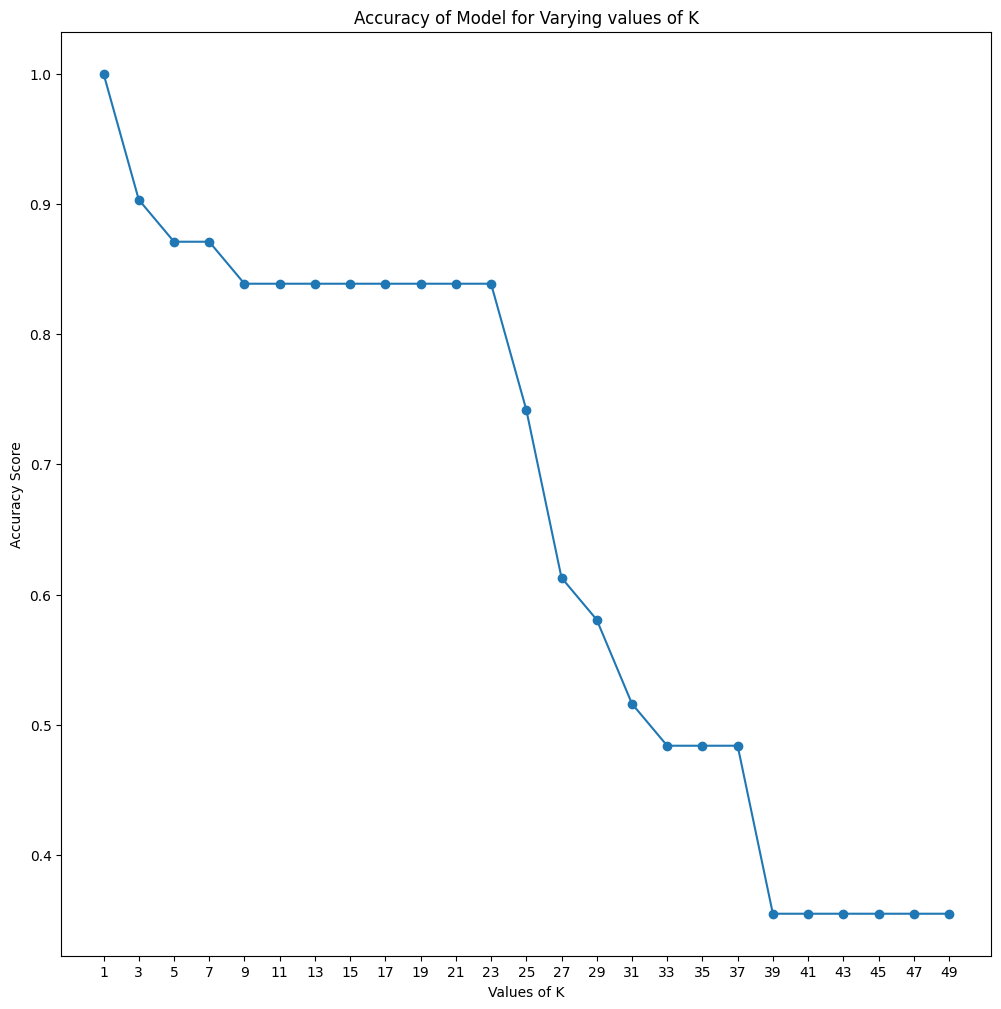

In [89]:
#Visualization of Model performance of Different k values

#Plot n values and accuracy scores
plt.plot(k_list, accuracy_list, marker='o')
plt.title('Accuracy of Model for Varying values of K')
plt.xlabel('Values of K')
plt.ylabel("Accuracy Score")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12, 12)
plt.show()

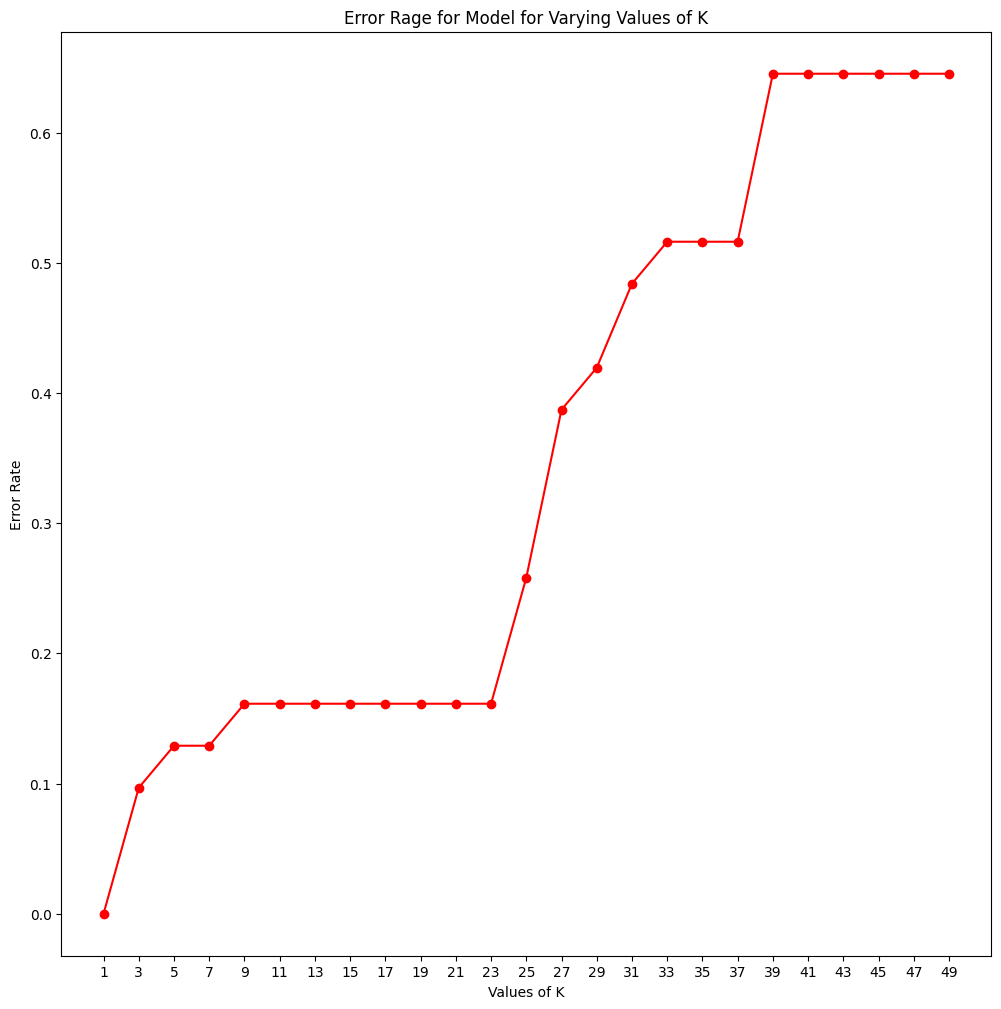

In [90]:
#Plotting K values against the error rate
plt.plot(k_list, error_rate, color='red', marker='o')
plt.title('Error Rage for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12, 12)
plt.show()

Finding the best value for K - Tuning and Optimizing KNN

In [91]:
#Using GridSearchCV Fitting the Model using GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50), "weights" : ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [92]:
#In the end, it will retain the best performing value of k
gridsearch.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [93]:
#How the best value of k affects the train and test performances
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse_grid = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse_grid = mean_squared_error(y_test, test_preds_grid)
test_rmse_grid = sqrt(test_mse_grid)
print("The Root Mean Squared Value for Train Dataset: ", train_rmse_grid)
print("The Root Mean Squared Value for Test Dataset: ", test_rmse_grid)

#We can see the both the train and test errors improved

The Root Mean Squared Value for Train Dataset:  0.0
The Root Mean Squared Value for Test Dataset:  0.7499756993486855


In [94]:
#Checking whether the performance of the Model will be any better when predicting using a weighted average instead of a regular average

parameters = {
    "n_neighbors": range(1, 50),
    "weights" : ["uniform", "distance"],
}

gridsearch_WeightedAverage = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch_WeightedAverage.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [95]:
gridsearch_WeightedAverage.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [96]:
test_preds_grid = gridsearch_WeightedAverage.predict(X_test)
test_mse_weight = mean_squared_error(y_test, test_preds_grid)
test_rmse_weight = sqrt(test_mse_weight)
test_rmse_weight #Here we get a worser performance than the regular average

0.7499756993486855

In [97]:
#Further Tuning the KNN with Bagging

#Creating a KNeighborsRegressor using the best choices for k
best_k = gridsearch_WeightedAverage.best_params_["n_neighbors"]
best_weights = gridsearch_WeightedAverage.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

In [98]:
#Import the BaggingRegressor class from Scikit-learn and create a new instance with 100 estimators using the bagged_knn model

from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

#Fitting the Bagging_model with the training data
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=4,
                                               weights='distance'),
                 n_estimators=100)

In [99]:
#Making the Prediction and Calculating the RMSE to see it it improved
test_preds_grid = bagging_model.predict(X_test)
test_mse_bagging = mean_squared_error(y_test, test_preds_grid)
test_rmse_bagging = sqrt(test_mse_bagging)
test_rmse_bagging

0.7720948726751843

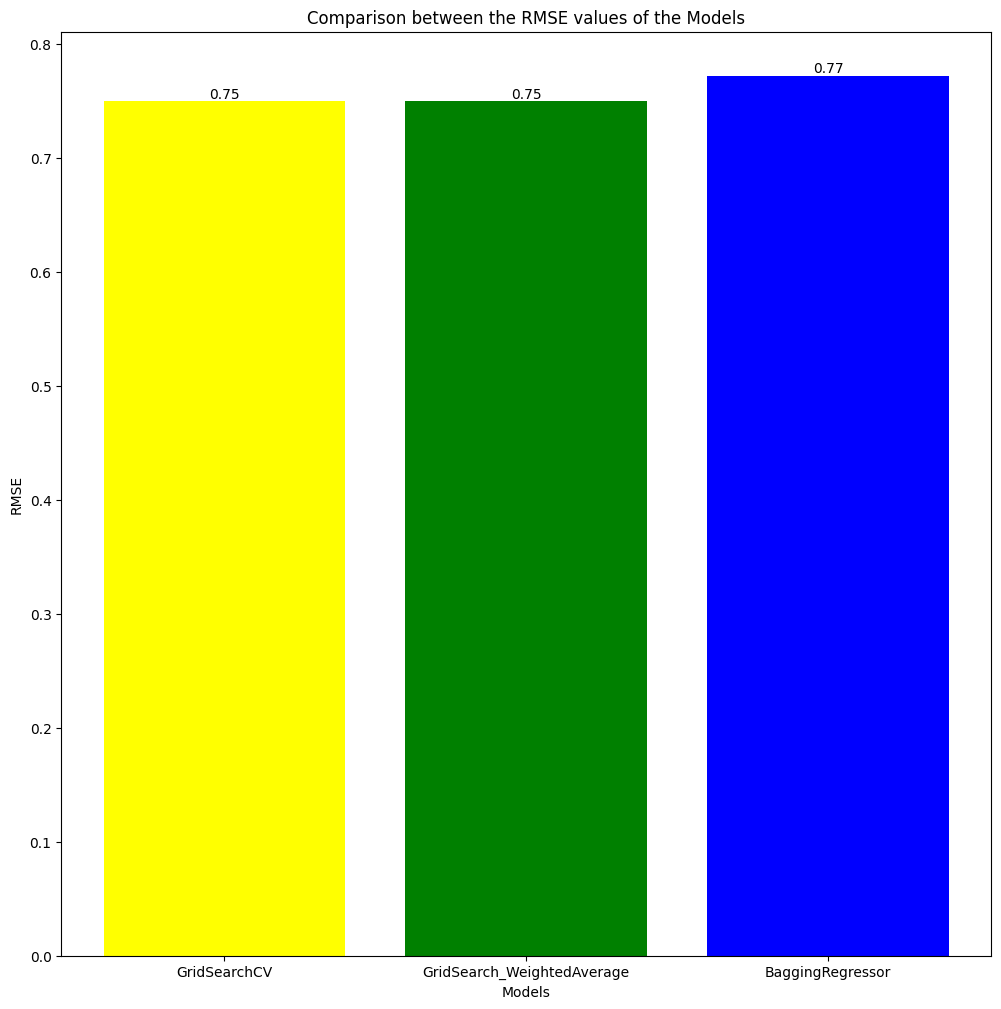

In [112]:
#Comparison on Models

test_rmse = [test_rmse_grid, test_rmse_weight, test_rmse_bagging]
tests = ['GridSearchCV', 'GridSearch_WeightedAverage', 'BaggingRegressor']
plt.bar(tests, test_rmse, color=['yellow', 'green', 'blue'])
plt.title('Comparison between the RMSE values of the Models')
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.xticks(range(len(tests)), tests)
# Add annotations to the bars
for i, rmse in enumerate(test_rmse):
    plt.text(i, rmse, f'{rmse:.2f}', ha='center', va='bottom')
plt.show()
